# 이분법 Bisection Method

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 방정식의 근 찾기
이분법을 이용해 x^5+x = 1의 해를 구해본다.

In [6]:
eps = 1e-08

def f(x):
    return x**5 + x - 1

In [17]:
x1 = -1
x2 = 1

while (abs(x2-x1) > eps):
    x3 = (x1+x2)/2.0
    if (f(x1)*f(x3)<0.0):
        x2 = x3
    else:
        x1 = x3
        
print(x3, f(x3))

0.7548776641488075 -5.503990263555636e-09


---
sin(x) - 1/2 = 0의 해를 구하여라

In [18]:
eps = 1e-8
def g(x):
    return np.sin(x)-0.5

y0 = 0.0
y1 = np.pi / 2.0

while(abs(y0-y1)>eps):
    y2 = (y0+y1)/2.0
    if ((g(y2)*g(y0)) < 0.0):
        y1 = y2
    else:
        y0 = y2

print(y2, f(y2))

0.5235987736477412 -0.43704684375385083


---

자성체를 구성하는 작은 스핀이 다른 모든 스핀과 상호작용을 한다고 하면, 온도 T에서 자성체의 자화도 m은  ising model에 의해 다음과 같다고 하자. 
```
m=tanh(m/T) 
```
이 식을 이용해 자화도 m을 이분법을 이용해 찾아 온도 T의 함수로 그리시오. 또한 상전이가 일어나는 온도 T_c를 구하시오.

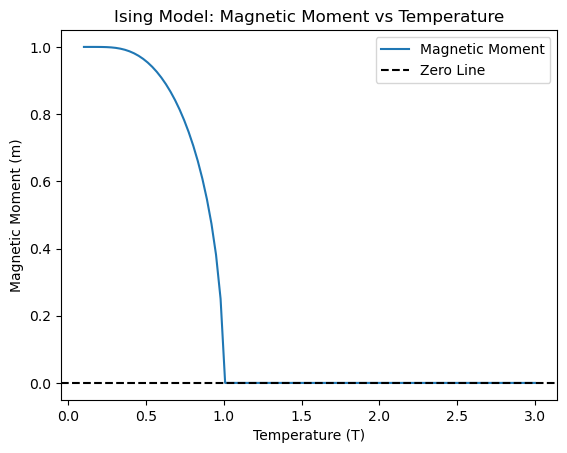

In [9]:
# 이분법 함수 정의
def find_magnetic_moment(T, max_iter=1000, tol=1e-6):
    m = 0.5  # 초기 추정값 (임의의 값)
    
    for _ in range(max_iter):
        m_new = np.tanh(m / T)
        
        # 수렴 조건
        if abs(m_new - m) < tol:
            return m_new
        
        m = m_new

    return None  # 수렴하지 않는 경우 None 반환

# 온도 범위 정의
temperatures = np.linspace(0.1, 3, 100)
magnetic_moments = []

# 온도에 따른 자화도 계산
for T in temperatures:
    magnetic_moment = find_magnetic_moment(T)
    magnetic_moments.append(magnetic_moment)

# 그래프 그리기
plt.plot(temperatures, magnetic_moments, label='Magnetic Moment')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Line')

plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Moment (m)')
plt.legend()
plt.title('Ising Model: Magnetic Moment vs Temperature')

plt.show()

---

In [10]:
import numpy as np

# 이분법 함수 정의
def find_theta(X_target, v_0, g, tol=1e-6, max_iter=1000):
    # 초기 추정값 (임의의 값)
    theta_low = 0
    theta_high = np.pi / 2
    
    for _ in range(max_iter):
        theta_mid = (theta_low + theta_high) / 2
        X_mid = (v_0**2 / g) * np.sin(2 * theta_mid)
        
        # 수렴 조건
        if abs(X_mid - X_target) < tol:
            return theta_mid
        
        # 이분법 적용
        if X_mid < X_target:
            theta_low = theta_mid
        else:
            theta_high = theta_mid

    return None  # 수렴하지 않는 경우 None 반환

# 주어진 값 설정
X_target = 1000  # 목표 수평 거리 (m)
v_0 = 100  # 초기 속력 (m/s)
g = 9.8  # 중력 가속도 (m/s^2)

# 이분법을 사용하여 theta 계산
theta_solution = find_theta(X_target, v_0, g)

# 결과 출력
if theta_solution is not None:
    print(f"theta의 값: {np.degrees(theta_solution)}도")
else:
    print("수렴하지 않았습니다. 더 많은 반복이 필요할 수 있습니다.")


theta의 값: 39.26082942634821도


In [11]:
def find_vel(X_target, theta, g, tol=1e-6, max_iter=1000):
    vel_low = 0
    vel_high = 1000

    for _ in range(max_iter):
        vel_mid = (vel_low + vel_high) / 2
        X_mid = (vel_mid**2 / g) * np.sin(2 * theta)

        if abs(X_mid - X_target) < tol:
            return vel_mid
    
        if X_mid < X_target:
            vel_low = vel_mid
        else:
            vel_high = vel_mid

    return None

# 주어진 값 설정
X_target = 1000  # 목표 수평 거리 (m)
theta = np.pi/4  # 초기 속력 (m/s)
g = 9.8  # 중력 가속도 (m/s^2)

vel_sol = find_vel(X_target, theta, g)

if vel_sol is not None:
    print(f"필요한 속도 v의 값: {vel_sol} m/s")
else:
    print("수렴하지 않았습니다. 더 많은 반복이 필요할 수 있습니다.")


필요한 속도 v의 값: 98.99494936689734 m/s
